In [16]:
from keras.applications.vgg16 import VGG16
import numpy as np
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten

model = VGG16(include_top=False, input_shape=(32, 32, 3))
flat = Flatten()(model.layers[-1].output)
d1 = Dense(1024, activation='relu')(flat)
output = Dense(5, activation='softmax')(d1)
model = Model(inputs=model.inputs, outputs=output)
model.summary()



from PIL import Image
import glob

dirs = ["fear", "Angry", "Happy", "Neutral", "disgust"]

res = {
        "fear" :   [ 1, 0, 0, 0 ,0],
        "Angry":   [ 0, 1, 0, 0, 0],
        "Neutral": [ 0, 0, 1, 0, 0],
        "Happy":   [ 0, 0, 0, 1, 0],
        "disgust": [ 0, 0, 0, 0, 1]
    }

inputs = []
results = []

import cv2
import random
from sklearn.utils import shuffle

for ii in dirs:
    files = glob.glob("ent/refined/output/"+ii+"/*")[200:]
    random.shuffle(files)
    
    for f in files:
        img = cv2.imread(f)
        img = cv2.resize(img, dsize=(32, 32), interpolation=cv2.INTER_CUBIC)

        img = np.array(img)
        inputs.append(img)
        results.append(res[ii])


inputs , results = np.array(inputs), np.array(results) 
inputs , results = shuffle(inputs , results, random_state=0)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   

In [17]:
np.shape(inputs)

(7198, 32, 32, 3)

In [18]:
from sklearn.utils import shuffle
inputs , results = shuffle(inputs , results, random_state=0)

In [19]:
testx, testy  = inputs[:5000], results[:5000]


In [20]:
print(np.shape(testx), np.shape(testy))
print(testy[0])

(5000, 32, 32, 3) (5000, 5)
[0 0 0 1 0]


157/157 [==============================] - 177s 1s/step - loss: 1.8202 - accuracy: 0.5276


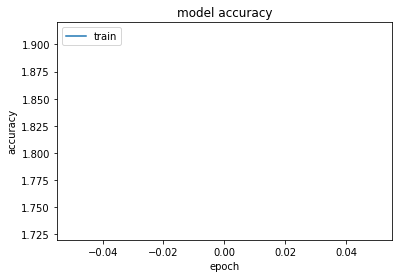

In [21]:
from matplotlib import pyplot as plt
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'] )
history = model.fit(testx , testy )

plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

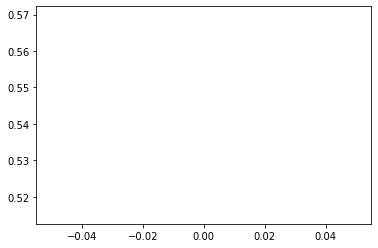

In [70]:
plt.plot(history.history['accuracy'])
plt.show()

In [22]:
x , y = inputs[5000:], results[5000:]
print(np.shape(x), np.shape(y))

(2198, 32, 32, 3) (2198, 5)


In [23]:
acc = model.evaluate(x, y)

69/69 [==============================] - 8s 109ms/step - loss: 1.0306 - accuracy: 0.6342


In [9]:
print(acc)

[1.1196064949035645, 0.6372981071472168]


In [25]:
N = len(inputs)
pred = []
orig = []
for i in range(100): 
    k = random.randint(0, 7000)
    predicted = model.predict(np.reshape(inputs[k], (1, 32, 32, 3)))
    m = max(predicted[0])
    for tt in range(0, 5):
        if predicted[0][tt] == m:
            pred.append(tt)
            print(tt , end=' ')
            break
    for tt in range(0 , 5):
        if results[k][tt] == 1:
            orig.append(tt)
            print(tt)
            break

print(np.shape(orig), np.shape(pred))

3 3
3 0
2 2
3 3
3 3
2 2
3 3
3 2
3 1
3 3
3 3
3 0
3 2
2 2
3 3
3 1
2 1
3 3
3 3
3 2
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 0
2 1
3 1
3 3
3 3
3 3
3 3
3 1
3 1
3 3
3 1
3 3
3 1
3 3
3 2
3 3
2 1
3 0
3 0
3 1
3 3
3 0
3 1
3 1
3 2
3 3
2 2
3 0
3 3
3 1
2 3
3 3
3 3
3 3
3 3
3 1
3 2
3 3
3 3
3 3
2 2
3 3
3 3
3 2
3 1
3 3
3 3
3 3
2 2
3 1
2 3
3 3
3 0
3 2
3 1
3 0
2 2
3 1
3 3
3 1
3 3
3 0
3 3
3 0
3 3
3 3
3 1
3 1
3 3
3 3
3 3
2 2
3 3
(100,) (100,)


In [29]:
print(orig)

[3, 0, 2, 3, 3, 2, 3, 2, 1, 3, 3, 0, 2, 2, 3, 1, 1, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 0, 1, 1, 3, 3, 3, 3, 1, 1, 3, 1, 3, 1, 3, 2, 3, 1, 0, 0, 1, 3, 0, 1, 1, 2, 3, 2, 0, 3, 1, 3, 3, 3, 3, 3, 1, 2, 3, 3, 3, 2, 3, 3, 2, 1, 3, 3, 3, 2, 1, 3, 3, 0, 2, 1, 0, 2, 1, 3, 1, 3, 0, 3, 0, 3, 3, 1, 1, 3, 3, 3, 2, 3]


ValueError: The number of FixedLocator locations (6), usually from a call to set_ticks, does not match the number of ticklabels (4).

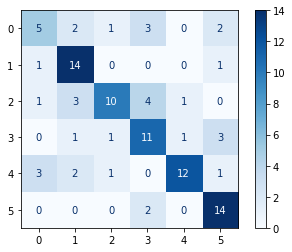

In [8]:
from sklearn.metrics import ConfusionMatrixDisplay , confusion_matrix

cm = confusion_matrix(orig, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm , display_labels=dirs[:4])

disp.plot(cmap=plt.cm.Blues)

In [14]:
from keras.models import save_model

save_model(model, "./model")

2021-12-13 13:39:47.908484: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ./model/assets
